# Universitat Oberta de Catalunya  
### Grado en Ingeniería Informática  
### Trabajo Final de Grado (TFG)

---

## Sistema de recomendaciones basado en técnicas de aprendizaje automático para ampliar la exploración de géneros musicales 
**Autor:** Marc Fernández Pereira  
**Bajo supervisión de:** Dra. María Moreno de Castro
**Área:** Inteligencia Artificial  
**Semestre:** Otoño 2025  

---

In [2]:
# Imports comunes
from imports import *

from utils.functions import *


## Índice

1. Análisis exploratorio del conjunto de datos (EDA)
   - 1.1. Recopilación de datos
   - 1.2. Descripción de los datos obtenidos
     - 1.2.1. Estructura y tipología de variables
     - 1.2.2. Valores faltantes y registros duplicados
     - 1.2.3. Estadística descriptiva de variables numéricas
     - 1.2.4. Distribuciones y forma de las variables (asimetría y curtosis)
       - 1.2.4.1. Variables cuantitativas continuas
       - 1.2.4.2. Variables cuantitativas discretas
     - 1.2.5. Visualizaciones de síntesis

---


# 1. Análisis exploratorio del conjunto de datos (EDA)

## 1.1. Recopilación de datos

El primer paso que se debe realizar en la fase de comprensión de los datos es la carga del conjunto de datos para describir el dataset con el que se entrenará el modelo.

In [3]:
# Cargar el conjunto de datos
df = pd.read_csv('dataset.csv')
# Configuración para que se muestren todas las columnas
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## 1.2. Descripción de los datos obtenidos

### 1.2.1 Estructura y tipología de variables

In [4]:
# Resumen de variables del dataset

info = []
for col in df.columns:
    
    data_type = df[col].dtype
    muestras = df[col].count()
    unique = df[col].nunique()
    missing = df[col].isnull().sum()
    not_available = df[col].isna().sum()
    sample = df[col].dropna().unique()[:5].tolist()
    
    info.append([col, data_type, muestras, unique, missing, not_available, sample])

df_description = pd.DataFrame(info)
df_description.columns = ['Variable', 'Tipo de datos', 'Muestras', 'Valores únicos', 'Valores faltantes', 'Valores no disponibles (NA)', 'Valores de ejemplo']

nCols, nRows = df.shape
print(f"El conjunto de datos contiene {nCols} observaciones y {nRows} variables.")

df_description

El conjunto de datos contiene 114000 observaciones y 21 variables.


,Variable,Tipo de datos,Muestras,Valores únicos,Valores faltantes,Valores no disponibles (NA),Valores de ejemplo
0,Unnamed: 0,int64,114000,114000,0,0,"[0, 1, 2, 3, 4]"
1,track_id,object,114000,89741,0,0,"[5SuOikwiRyPMVoIQDJUgSV, 4qPNDBW1i3p13qLCt0Ki3..."
2,artists,object,113999,31437,1,1,"[Gen Hoshino, Ben Woodward, Ingrid Michaelson;..."
3,album_name,object,113999,46589,1,1,"[Comedy, Ghost (Acoustic), To Begin Again, Cra..."
4,track_name,object,113999,73608,1,1,"[Comedy, Ghost - Acoustic, To Begin Again, Can..."
5,popularity,int64,114000,101,0,0,"[73, 55, 57, 71, 82]"
6,duration_ms,int64,114000,50697,0,0,"[230666, 149610, 210826, 201933, 198853]"
7,explicit,bool,114000,2,0,0,"[False, True]"
8,danceability,float64,114000,1174,0,0,"[0.676, 0.42, 0.438, 0.266, 0.618]"
9,energy,float64,114000,2083,0,0,"[0.461, 0.166, 0.359, 0.0596, 0.443]"


Se observa que el conjunto de datos está formado por un total de **114000 observaciones** y **21 variables**.
Además, también se puede comprobar que se cuenta con una diversidad de datos distribuidos en: **5 variables categóricas** (track_id, artists, album_name, track_name y track_genre), **4 variables numéricas enteras** (popularity, duration_ms, key y time_signature), **9 variables numéricas continuas** (métricas de audio como danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence y tempo), **1 variable booleana** (explicit) y **1 variable binaria discreta** (mode), la cual funciona como una variable binaria e indica la modalidad mayor (1) o menor (0) de cada canción.

se adjunta un diccionario de datos con la descripción de cada variable de acuerdo con la documentación proporcionada por el autor del dataset [**Spotify Tracks Dataset**](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset):

- **unnamed:0**: Identificador incremental de la tabla.
- **track_id**: Identificador único de la canción en Spotify.
- **artists**: Nombres de los artistas que interpretan la canción. Si hay más de un artista, se separan por punto y coma (;).
- **album_name**: Nombre del álbum al que pertenece la canción.
- **track_name**: Nombre de la canción.
- **popularity**: Popularidad de la canción en una escala de 0 a 100, donde 100 es la más popular. Se calcula mediante un algoritmo basado principalmente en el número total de reproducciones y la antigüedad de las mismas. Generalmente, las canciones reproducidas frecuentemente en el presente tienen mayor popularidad que las que fueron populares en el pasado.
- **duration_ms**: Duración de la canción en milisegundos.
- **explicit**: Indica si la canción contiene letras explícitas (true = sí; false = no o desconocido).
- **danceability**: Describe qué tan adecuada es una canción para bailar basándose en elementos musicales como tempo, estabilidad del ritmo y regularidad general. Valores entre 0.0 (menos bailable) y 1.0 (más bailable).
- **energy**: Medida de intensidad y actividad percibida de 0.0 a 1.0. Las canciones energéticas suelen sonar rápidas, fuertes y ruidosas (ej: death metal tiene alta energía; un preludio de Bach tiene baja energía).
- **key**: Tonalidad de la canción. Los enteros se mapean a notas usando la notación estándar Pitch Class (0 = Do, 1 = Do#/Reb, 2 = Re, etc.). Si no se detecta tonalidad, el valor es -1.
- **loudness**: Sonoridad general de la canción en decibelios (dB).
- **mode**: Modalidad de la canción (mayor o menor), indicando el tipo de escala de la que deriva su contenido melódico. Valores: 1 = mayor, 0 = menor.
- **speechiness**: Detecta la presencia de palabras habladas en la canción. Valores superiores a 0.66 indican pistas probablemente habladas (talk show, audiolibro); entre 0.33 y 0.66 pueden contener música y habla (rap); menores a 0.33 representan principalmente música.
- **acousticness**: Medida de confianza de 0.0 a 1.0 sobre si la canción es acústica. 1.0 indica alta confianza de que es acústica.
- **instrumentalness**: Predice si la canción no contiene vocales. Valores cercanos a 1.0 indican mayor probabilidad de ausencia de contenido vocal.
- **liveness**: Indica la presencia de personas en la grabación. Valores altos representan mayor probabilidad de que la canción fue interpretada en vivo. Valores superiores a 0.8 indican alta probabilidad de interpretación en vivo.
- **valence**: Medida de 0.0 a 1.0 que describe la positividad musical transmitida por la canción. Valores altos suenan más positivos (alegres, eufóricos), mientras que valores bajos suenan más negativos (tristes, depresivos).
- **tempo**: Tempo estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo indica la velocidad o ritmo de una pieza y se deriva directamente de la duración media de los pulsos.
- **time_signature**: Compás estimado. El compás es una convención musical que indica cuántos tiempos hay en cada compás. Su valor oscila entre 3 y 7, representando compases de 3/4 hasta 7/4.
- **track_genre**: Género musical al que pertenece la canción.


### 1.2.2 Valores faltantes y registros duplicados

Se observa que el conjunto de datos **no presenta valores faltantes** a excepción de **una observación** que no dispone de información sobre la persona artista, el álbum y el nombre de la canción. 

Además, cabe destacar que la variable **unnamed:0** no aporta valor para el desarrollo del proyecto ya que se trata de un identificador incremental de cada muestra y, en consecuencia, podría influir negativamente en los resultados de los algoritmos de *clustering*. Por esta razón, se elimina esta columna antes de proceder con el análisis, a pesar de estar aún en la fase de comprensión de datos y no en la fase de preparación ya que la presencia de esta columna dificulta la identificación de registros duplicados, aspecto que debe ser analizado en esta fase.

A continuación, se procede a identificar si existen datos **duplicados** en el conjunto de datos:

In [5]:
try:
    df = df.drop(columns=['Unnamed: 0'])
except:
    print("La columna 'Unnamed: 0' no existe en el conjunto de datos.")

duplicated = df.duplicated().sum()
print("\n")
print(f"El número total de duplicados es de {duplicated}, lo que representa un total del {duplicated/len(df)*100:.2f}% del total de datos.")



El número total de duplicados es de 450, lo que representa un total del 0.39% del total de datos.


Los resultados muestran que el conjunto de datos contiene **450 registros duplicados**, lo que representa el **0.39% del total de observaciones**. Este porcentaje es relativamente bajo y, por tanto, no debería afectar significativamente el análisis exploratorio inicial. 

Sin embargo, es importante tener en cuenta que estos duplicados deberán ser eliminados durante la **Fase 3: Preparación de datos**, junto con el registro que presenta valores faltantes, con el objetivo de seguir las directrices que marca la metodología CRISP-DM.

### 1.2.3 Estadística descriptiva de variables numéricas

#### Resumen estadístico de variables numéricas

In [6]:
# Separamos las variables numéricas y las categóricas en dos dataframes distintos
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(include = object)
# Describir variables numéricas
desc_df = num_df.describe().round(2)
desc_df.rename(index={'50%': 'median'}, inplace=True)
desc_df

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
median,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


El primer hecho que se observa en la descripción estadística anterior es que algunas variables se representan en rangos muy distintos a las demás. Por ejemplo, **duration_ms** toma valores desde 0 hasta 5237295, lo que podría sesgar el análisis y, en consecuencia, obtener un resultado no esperado. Además, en general las variables operan en escalas heterogéneas, por lo que en la fase de preparación se normalizarán/estandarizarán los datos para homogeneizar escalas y evitar que ninguna característica domine el cálculo de distancias en los algoritmos de *clustering*. Otro hecho a destacar y que merece prestar atención es la presencia de múltiples valores mínimos iguales a 0. Para comprender la situación se procede a cuantificar por variable cuántas muestras toman valores igual a 0:

In [7]:
df[df == 0].count()

track_id                 0
artists                  0
album_name               0
track_name               0
popularity           16020
duration_ms              1
explicit            104253
danceability           157
energy                   1
key                  13061
loudness                 0
mode                 41319
speechiness            157
acousticness            39
instrumentalness     38763
liveness                 2
valence                176
tempo                  157
time_signature         163
track_genre              0
dtype: int64

Sin ser expertos en materia musical, se puede observar algunas incongruencias:
- **tempo**: toda composición musical está definida por un tempo expresado en pulsos por minuto, por lo que resulta prácticamente imposible que el valor del tempo sea igual a 0. Este caso probablemente se deba a un error de medición.
- **time_signature**: de forma análoga al tempo, toda canción debe estar compuesta dentro de un compás, por lo que valores iguales a 0 tampoco tienen sentido. Es probable que también se trate de un error de medición.
- **duration_ms**: aunque únicamente se detecta una muestra con duración igual a 0, este valor tampoco resulta coherente dentro del contexto musical.

En cuanto al resto de variables, los valores iguales a 0 sí pueden tener sentido musical. Por ejemplo, que la **popularity** de una canción sea 0 indica que su nivel de reproducciones por parte de la audiencia es mínimo o nulo. Lo mismo ocurre con **valence**, **liveness**, **instrumentalness**, **acousticness**, **speechiness**, **danceability** o **energy**: que estas variables adopten valores iguales a 0 refleja rasgos propios de la pieza, como la ausencia de voz, baja energía o carencia de componentes acústicos. Y, por último, cabe destacar que la variable **mode** se comporta como un dato booleano ya que toma valores igual a 0 o 1. 


### 1.2.4 Distribuciones y forma de las variables (asimetría y curtosis)

#### Metodología: asimetría (Fisher–Pearson) y curtosis

Llegados a este punto, para analizar el comportamiento de las variables se complementará la tabla estadística con un gráfico de distribuciones para cada una de ellas. Antes de proceder con ello, se excluirán del conjunto numérico aquellas variables discretas no continuas, como key, que define un rango de 0 a 11 para referirse a la tonalidad de la canción, y time_signature, que representa el compás musical. Dado que ambas son variables con un número limitado de valores posibles, su análisis mediante histogramas no resultaría representativo, por lo que se optará por tratarlas como variables categóricas y analizarlas mediante otro tipo de gráficas. Además, para facilitar el análisis se calculará para cada distribución el coeficiente de Fisher-Pearson y el grado de curtosis.

##### Cálculos del Coeficiente de Fisher-Pearson y el grado de Curtosis
A veces no es tarea sencilla determinar la forma de una distribución simplemente mirando un gráfico. Para ello se propone extraer el coeficiente de asimetría de la distribución y su grado de [curtosis](https://en.wikipedia.org/wiki/Kurtosis). Por un lado, el grado de asimetría permite extraer la longitud de las colas (tanto de la izquierda como de la derecha) de una distribución para identificar sesgos en los datos. Por otro lado, la curtosis indica cuán puntiaguda o plana es la distribución, es decir, se centra en definir la altura de la misma.

Para obtener el grado de asimetría se utilizará el [coeficiente de asimetría de Fisher–Pearson](https://teflpedia.com/Fisher%E2%80%93Pearson_sample_skewness) para cada distribución. Los valores obtenidos mediante la implementación del coeficiente cercanos al 0 indicarán que la distribución tiende a ser simétrica. Sin embargo, si se obtiene un valor > 0 quiere decir que la distribución es asimétrica positiva (cola a la derecha) y si el valor < 0 la distribución es asimétrica negativa (cola a la izquierda). Cabe destacar que, a pesar de que se obtenga un valor distinto a 0 pero muy cercano, se podría considerar que la distribución tiende a ser normal. Así pues, para extraer la asimetría de cada variable se deberá aplicar la siguiente ecuación:

$$
\text{Skewness} = \frac{n}{(n - 1)(n - 2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$


En una distribución normal, la curtosis toma el valor $k = 3$. Habitualmente se reporta el exceso de curtosis, definido como $k - 3$, para centrar la interpretación respecto a la normal. La fórmula del exceso de curtosis es:

$$
\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3
$$

Los resultados se pueden interpretar de la siguiente manera:

- **Distribución leptocúrtica (> 0)**: colas más pesadas y pico más alto
- **Distribución platicúrtica (< 0)**: colas más ligeras y pico más bajo
- **Distribución mesocúrtica (= 0)**: similar a la distribución normal

Llegados a este punto, se procede a realizar el análisis descriptivo de las variables numéricas.

### 1.2.4.1 Variables cuantitativas continuas
#### Variable duration_ms

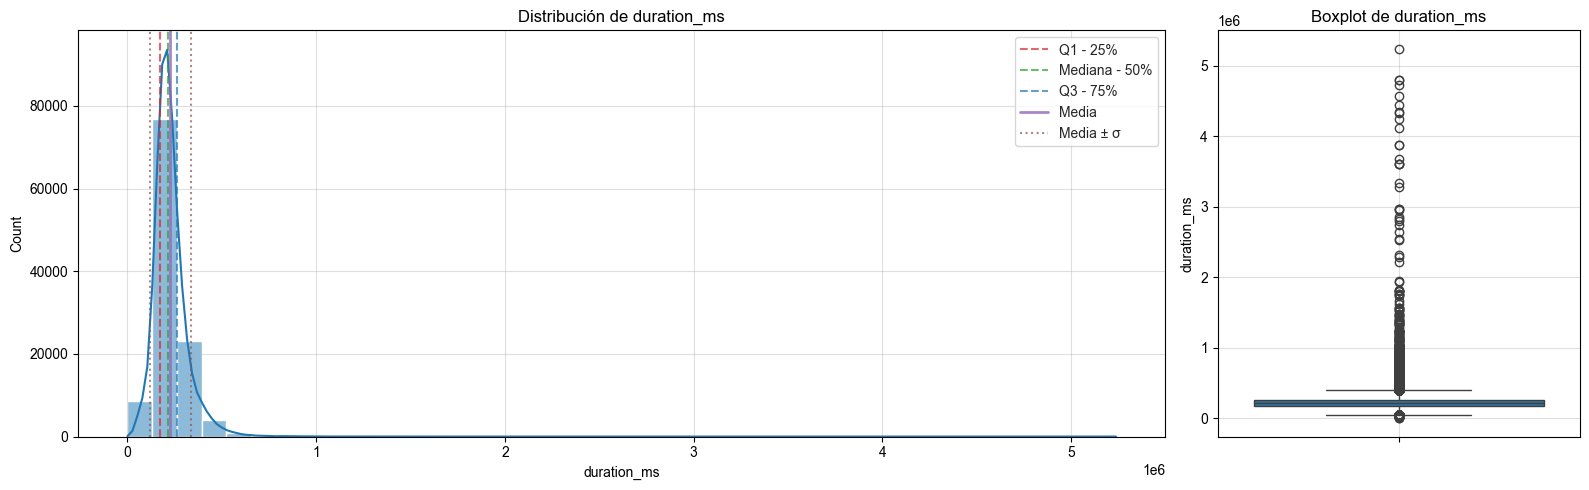

Coeficiente de asimetría:' 11.195328786762138
Grado de curtosis:' 354.93679511430054


In [8]:
# Distribución de duration_ms
plot_distribution(num_df, 'duration_ms')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'duration_ms')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'duration_ms')}")

La distribución presenta una larga cola hacia la derecha, lo que indica una asimetría positiva pronunciada y un claro sesgo hacia valores altos. El valor de curtosis (354) se encuentra muy alejado del correspondiente a una distribución normal (0 de exceso), lo que confirma que la forma es altamente leptocúrtica, caracterizada por un pico agudo y colas pesadas. Esto sugiere que la mayoría de las canciones (aproximadamente la mitad) presentan duraciones cercanas a la mediana (212906 ms, equivalentes a 3,54 min), es decir, relativamente cortas respecto al resto.
En el boxplot se aprecian valores atípicos extremos que se alejan del rango intercuartílico, con un máximo de 5237295 ms (87 min), lo que podría corresponder a grabaciones extensas, como mezclas continuas, conciertos, sesiones musicales o incluso podcasts y audiolibros.


#### Variable danceability

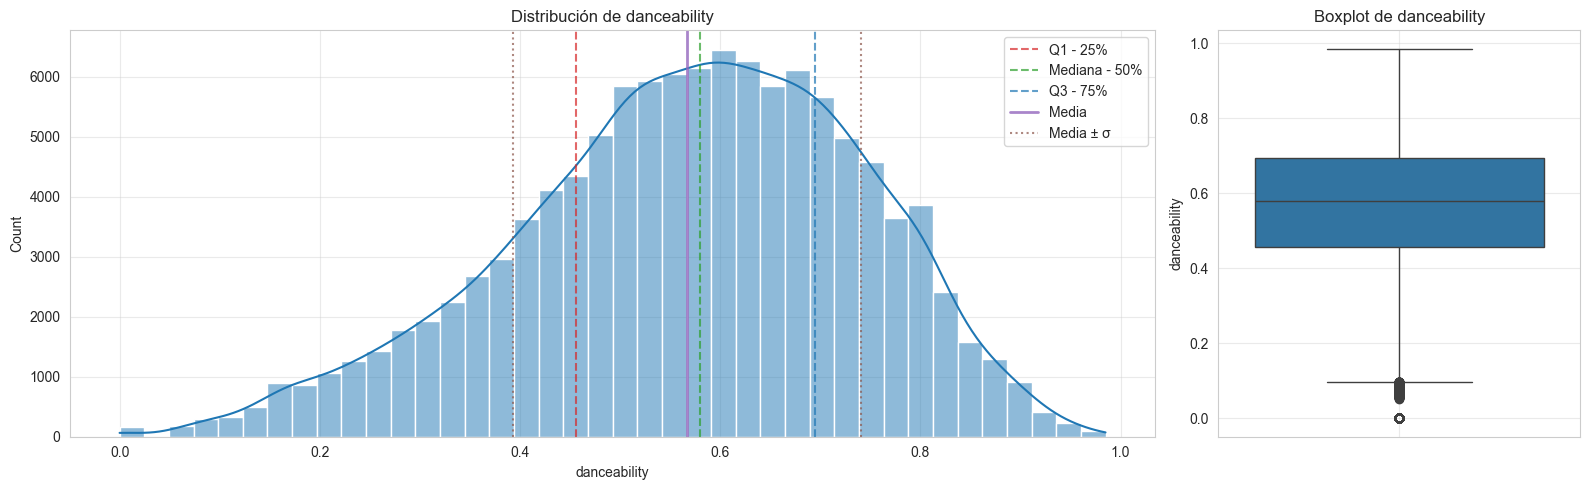

Coeficiente de asimetría:' -0.39950189010665244
Grado de curtosis:' -0.1845469937367703


In [9]:
# Distribución de danceability
plot_distribution(num_df, 'danceability')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'danceability')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'danceability')}")

La variable danceability toma valores de asimetría y curtosis cerca de -0,39 y -018 respectivamente, lo que evidencia que la distribución de los datos se acerca a la forma simétrica tanto en dispersión como en altura formando una ligera cola hacia la izquierda. Los datos evidencian dos aspectos importantes: por un lado, se puede interpretar como que hay más canciones aptas para bailar que canciones que no son tan bailables y, por otro lado, se puede observar que prácticamente toda la música es apta para poder bailar en mayor o menor medida. La variable es numérica y acotada en el rango [0, 1], donde los valores más altos indican una mayor presencia de la característica medida.

#### Variable energy

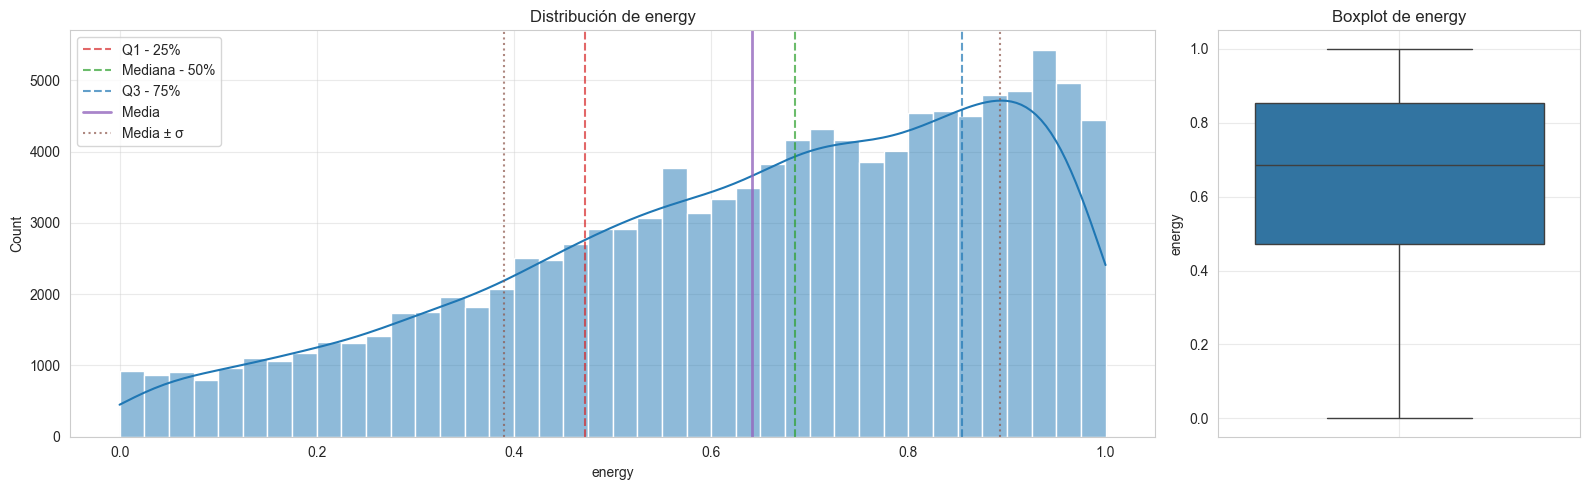

Coeficiente de asimetría:' -0.5970092723881604
Grado de curtosis:' -0.525740398582129


In [10]:
# Distribución de energy
plot_distribution(num_df, 'energy', bw_adjust = 2)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'energy')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'energy')}")

La variable energy presenta un coeficiente de asimetría de -0,59, lo que indica una asimetría negativa moderada con una ligera cola hacia la izquierda. En otras palabras, existen más canciones con valores altos de energía que con valores bajos lo que se refleja una tendencia general hacia música enérgica. El grado de curtosis de -0,52 sugiere una distribución platicúrtica, es decir, algo más aplanada que una distribución normal. Esto implica una menor concentración de valores en torno a la media y una mayor dispersión relativa. En conjunto, puede interpretarse que la mayoría de las canciones del conjunto presentan niveles de energía elevados (entre ~0.4 y ~0.9), aunque existe cierta variabilidad que refleja la presencia de temas más suaves o menos intensos en menor proporción. No se observan *outliers*. La variable es numérica y acotada en el rango [0, 1], donde los valores más altos indican una mayor presencia de la característica medida.

#### Variable loudness

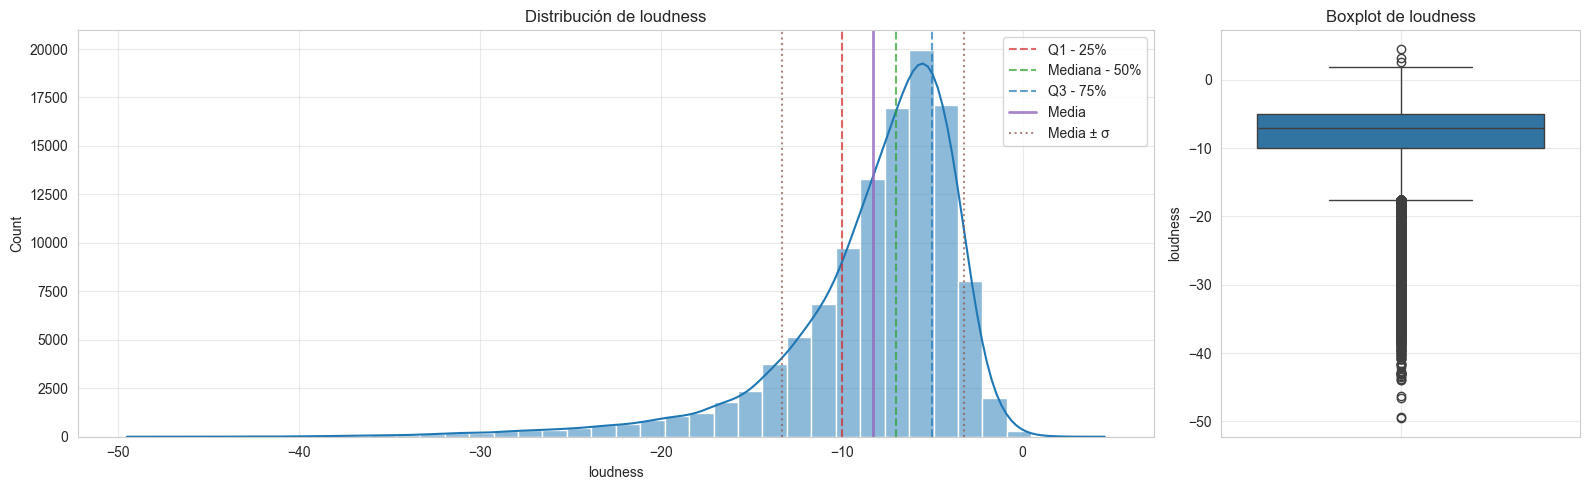

Coeficiente de asimetría:' -2.006568335884186
Grado de curtosis:' 5.895966941358701


In [11]:
# Distribución de loudness
plot_distribution(num_df, 'loudness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'loudness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'loudness')}")

Para interpretar estos resultados, es importante comprender que, en términos musicales, el nivel 0 dB representa el máximo nivel de intensidad sonora que puede alcanzar una canción, mientras que los valores negativos indican niveles de volumen más bajos.
Generalmente, las observaciones del conjunto de datos se sitúan entre -5 dB y -15 dB, lo que implica que la mayoría de las canciones comprendidas dentro del rango intercuartílico presentan un nivel de sonoridad elevado.
Estas conclusiones se sustentan en el coeficiente de asimetría (-2,00) y en el grado de curtosis (5,8), que reflejan una distribución fuertemente asimétrica negativa y leptocúrtica; dicho de otro modo, la variable loudness forma una cola pronunciada hacia la izquierda, indicando la presencia de canciones con niveles de volumen considerablemente más bajos respecto al conjunto general.


#### Variable speechiness

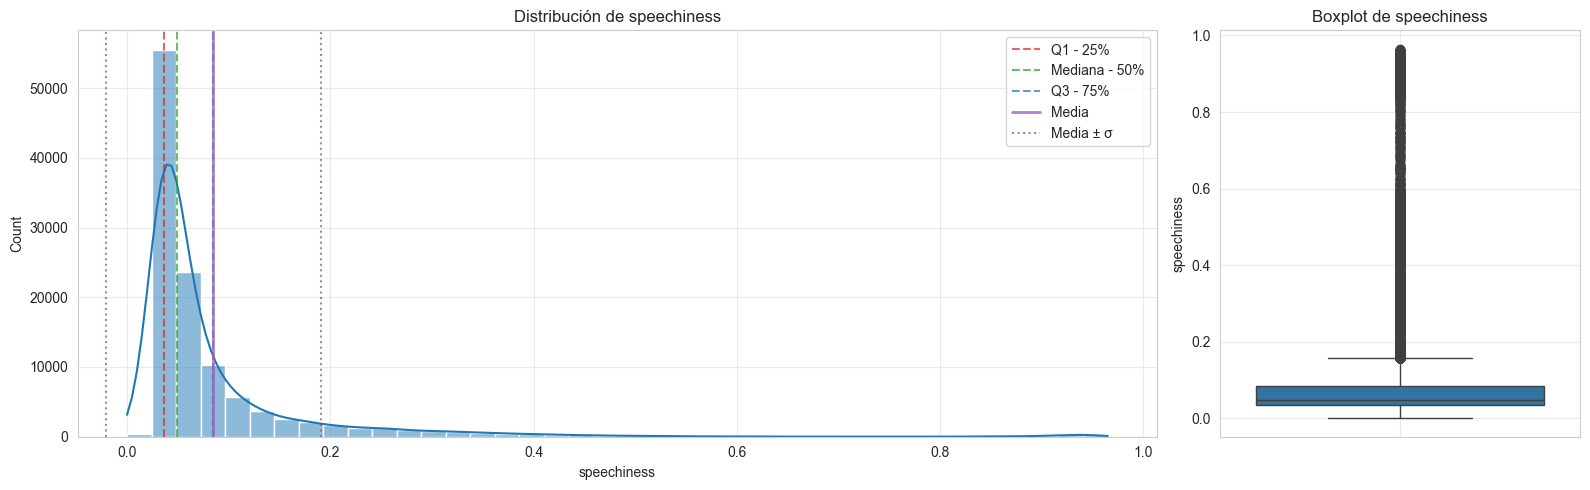

Coeficiente de asimetría:' 4.6475771700232675
Grado de curtosis:' 28.823059897476877


In [12]:
# Distribución de speechiness
plot_distribution(num_df, 'speechiness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'speechiness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'speechiness')}")


La variable speechiness presenta un coeficiente de asimetría positivo elevado (4,65), lo que evidencia una distribución leptocúrtica fuertemente sesgada a la derecha. Esto significa que la gran mayoría de canciones presentan niveles muy bajos de contenido hablado ya que están sesgadas fuertemente hacia 0. Sin embargo, tal y como se observa en el boxplot existen múltiples *outliers* cerca de 1, lo que sugiere la hipótesis de que algunos registros son audiolibros, podcasts, canciones de rap, etc. Se observa una alta cantidad de *outliers*.

En resumen, el rango de esta variable está comprendido entre 0 y 1, reflejando que se trata de una medida proporcional donde los valores más altos indican una mayor presencia de voz hablada frente al contenido musical.

#### Variable acousticness

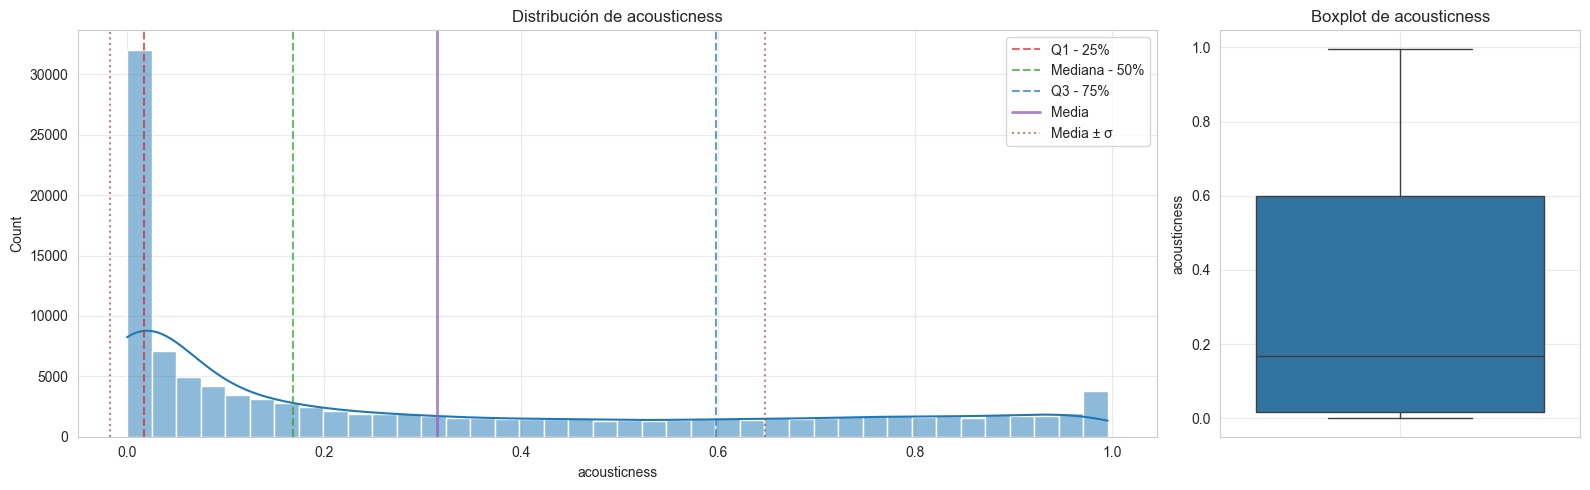

Coeficiente de asimetría:' 0.7273044304959352
Grado de curtosis:' -0.9499422537291955


In [13]:
# Distribución de acousticness
plot_distribution(num_df, 'acousticness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'acousticness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'acousticness')}")

En este caso, la distribución presenta una asimetría positiva (extendida hacia la derecha) marcada pero no exagerada tomando un coeficiente de 0.72, donde se concentran la gran mayoría de datos entre 0 y 0.65. Esto indica que la mayoría de las canciones del conjunto de datos tienden a tener una baja componente acústica, es decir, predominan las producciones no acústicas. Sin embargo, el boxplot muestra que existe una variabilidad considerable y un número significativo de canciones con valores altos de acousticness, correspondientes a temas predominantemente acústicos, como grabaciones en vivo, acústicas o de géneros más orgánicos (folk, jazz, clásica, etc.)

#### Variable instrumentalness

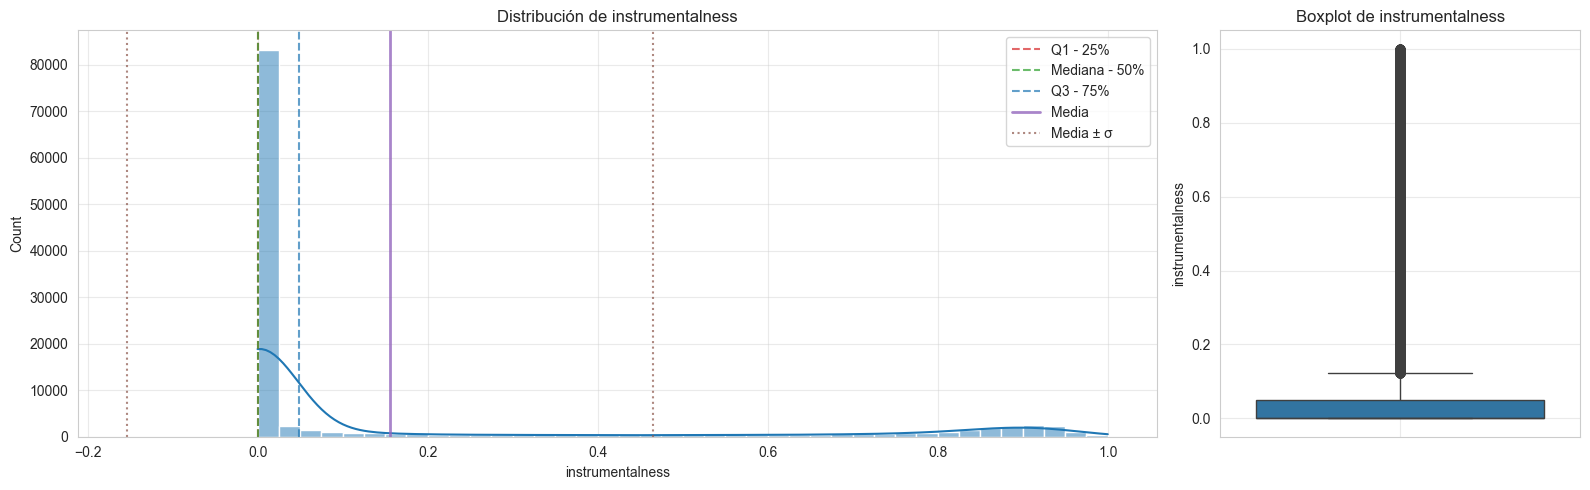

Coeficiente de asimetría:' 1.734429014063966
Grado de curtosis:' 1.2706387134318877


In [14]:
# Distribución de instrumentalness
plot_distribution(num_df, 'instrumentalness')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'instrumentalness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'instrumentalness')}")

En este caso, la distribución muestra nuevamente una cola pronunciada hacia la derecha, con un coeficiente de asimetría positivo de 1,73, lo que indica una asimetría moderada-alta. Este comportamiento sugiere que la mayoría de las canciones del conjunto están compuestas con una importante presencia instrumental, ya que el rango intercuartílico se concentra muy cerca de 0.
No obstante, al igual que en otras variables, se observan numerosos *outliers* que representan canciones con baja presencia de instrumentos, con valores próximos a 1.

#### Variable liveness

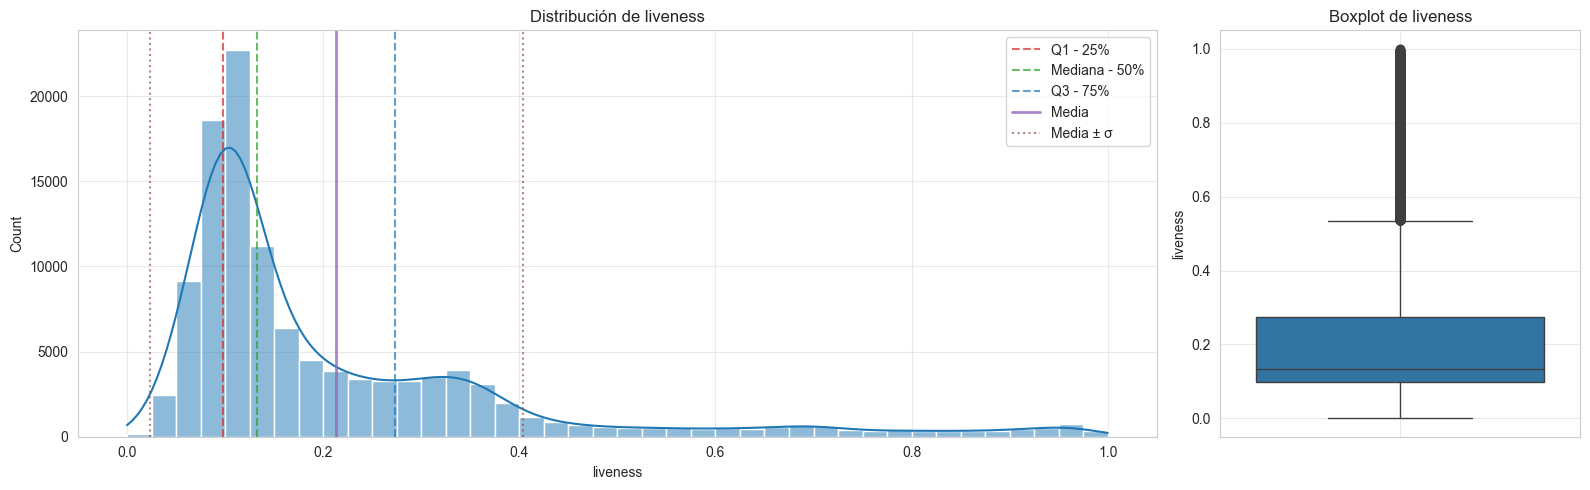

Coeficiente de asimetría:' 2.105765824496327
Grado de curtosis:' 4.378023604260159


In [15]:
# Distribución de liveness
plot_distribution(num_df, 'liveness', bw_adjust =  1.5)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'liveness')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'liveness')}")

En este caso, la distribución presenta una cola alargada hacia la derecha, con un coeficiente de asimetría de 2,10, lo que evidencia una asimetría positiva pronunciada. Este comportamiento indica que la mayoría de las canciones presentan valores bajos de liveness, lo que sugiere que fueron grabadas en estudio de grabación. Sin embargo, también se visualizan  varios *outliers* donde se puede interpretar que también hay canciones grabadas en directo como por ejemplo en un concierto.

La variable es numérica y acotada en el rango [0, 1], donde los valores más altos indican una mayor presencia de la característica medida.

#### Variable valence

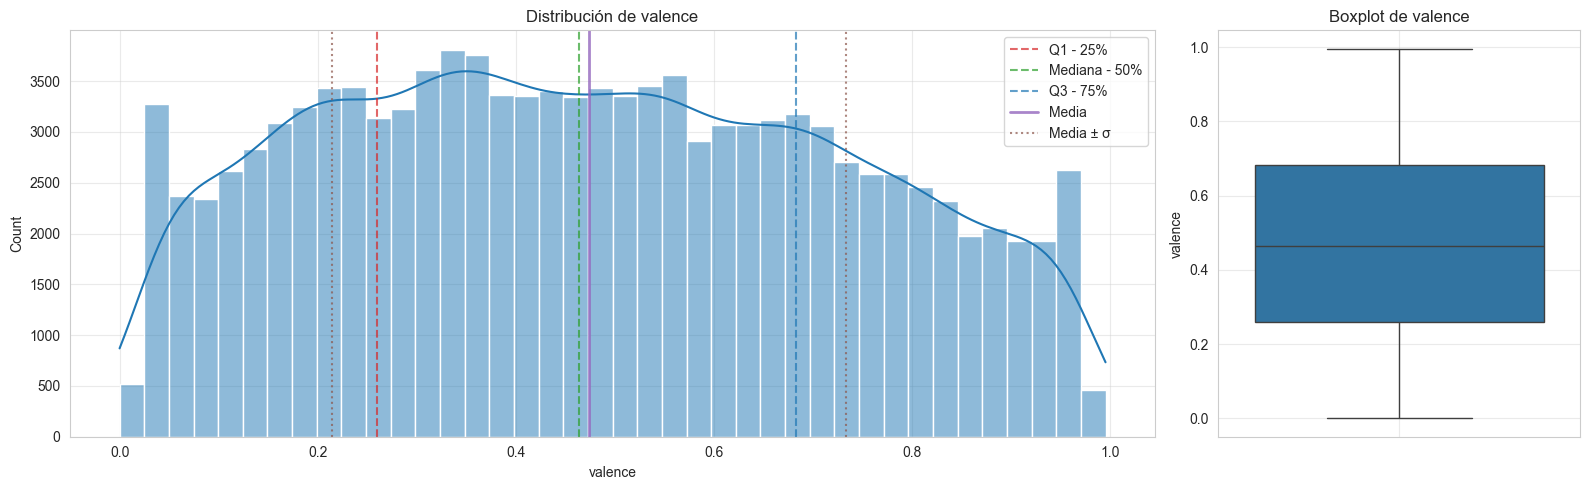

Coeficiente de asimetría:' 0.11507955625243346
Grado de curtosis:' -1.02743730415953


In [16]:
# Distribución de valence
plot_distribution(num_df, 'valence')
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'valence')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'valence')}")

El primer hecho que se visualiza es que el atributo valence tiende a ser simétrico con un valor próximo a 0 (0.11). Además, el grado de curtosis demuestra que existe cierto aplanamiento (distribución mesocúrtica) pero tampoco se aleja mucho de la distribución simétrica perfecta. Así pues, esta variable presenta una distribución bastante equilibrada, sin una asimetría destacable, lo que indica que los valores de positividad emocional se reparten de forma relativamente homogénea a lo largo del rango [0, 1]. Esto sugiere que el conjunto de datos incluye canciones tanto alegres como melancólicas en proporciones similares, sin que predomine un tono emocional concreto. El boxplot confirma esta observación, mostrando una dispersión uniforme y la ausencia de valores atípicos significativos.

#### Variable tempo

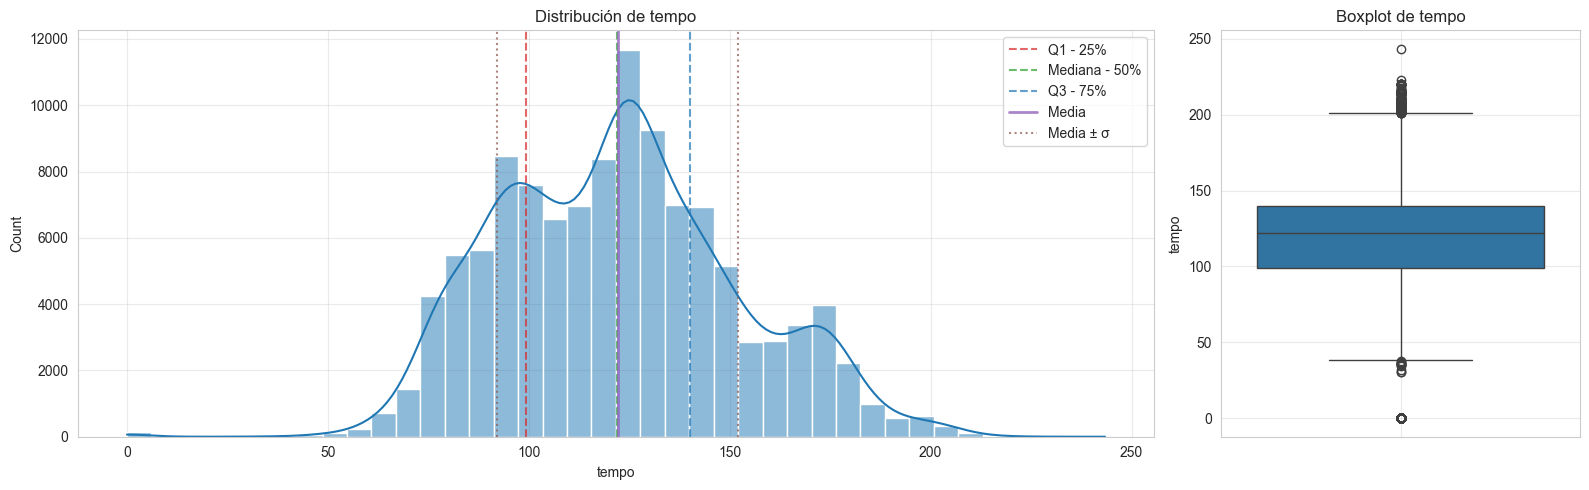

Coeficiente de asimetría:' 0.23229791709660788
Grado de curtosis:' -0.10862847700698985


In [17]:
# Distribución de tempo
plot_distribution(num_df, 'tempo', bw_adjust = 2)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'tempo')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'tempo')}")

La variable tempo presenta una distribución multimodal, con varios picos de frecuencia entre 80 y 150 ppm, que coinciden con los rangos de ritmo más habituales en géneros populares como el pop, el rock o la música electrónica. Se ha decido configurar un ajuste de ancho de banda del kernel (kde) igual a 5 para suavizar la curva y evitar los picos ocasionados lo que demuestra que la distribución de datos de tempo se acerca a una distribución normal. Además, se observa además que la media se sitúa en 120ppm lo que sugiere que este tempo es el equilibrio entre música lenta y rápida. Y, por último, cabe señalar que el boxplot muestra algunos *outliers* asociados a canciones muy lentas o extremadamente rápidas, aunque su presencia no es realmente muy significativa.

### 1.2.4.2 Variables cuantitativas discretas

A continuación, se procede a analizar las variables cuantitativas discretas. 

#### Variable popularity

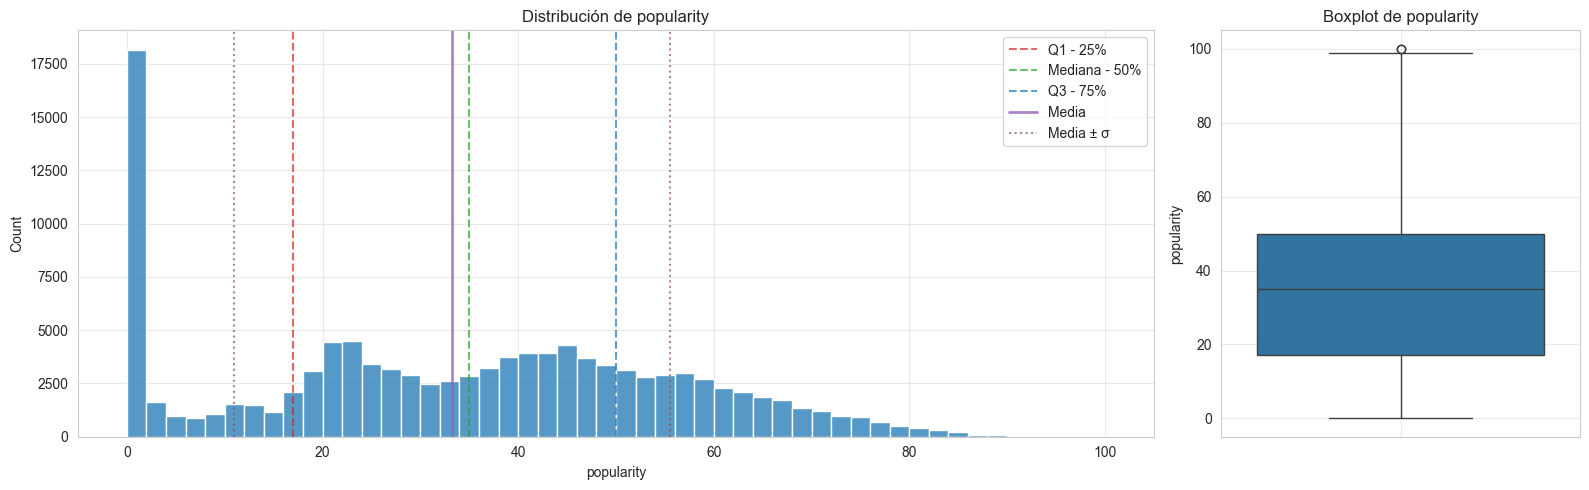

Coeficiente de asimetría:' 0.0464031263978908
Grado de curtosis:' -0.9277672588629766


In [18]:
plot_distribution(num_df, 'popularity', kde=False, bins=50)
print(f"Coeficiente de asimetría:' {get_skewness_coeficient(num_df, 'popularity')}")
print(f"Grado de curtosis:' {get_kurtosis_coeficient(num_df, 'popularity')}")

El hecho más evidente que se puede observar en el histograma de frecuencias de la variable popularity es la presencia de un gran número de canciones con valores de popularidad muy bajos, aproximadamente unas 20000 observaciones con valores cercanos a cero. Este comportamiento se debe a que existe una gran cantidad de canciones poco conocidas o apenas reproducidas por las personas usuarias.

Desde el punto de vista estadístico, el coeficiente de asimetría toma un valor cercano a 0 (0.046), lo que indica que la distribución puede considerarse prácticamente simétrica. A simple vista podría parecer que la cola se extiende hacia la derecha, pero el elevado número de canciones con popularidad baja compensa la distribución, equilibrando su dispersión.

En cuanto al grado de curtosis (-0.928), al ser un valor inferior a 0, se concluye que la distribución es platicúrtica, es decir, presenta un pico más aplanado y colas más ligeras que la distribución normal, lo cual refleja una menor concentración de valores en torno a la media.

Por otro lado, se aprecia que dentro del conjunto de datos existen muy pocas canciones con valores de popularidad elevados, cercanos a 100, que actúan como valores atípicos (outliers) y corresponden probablemente a los temas más reproducidos en la plataforma.

#### Variable key y time_signature

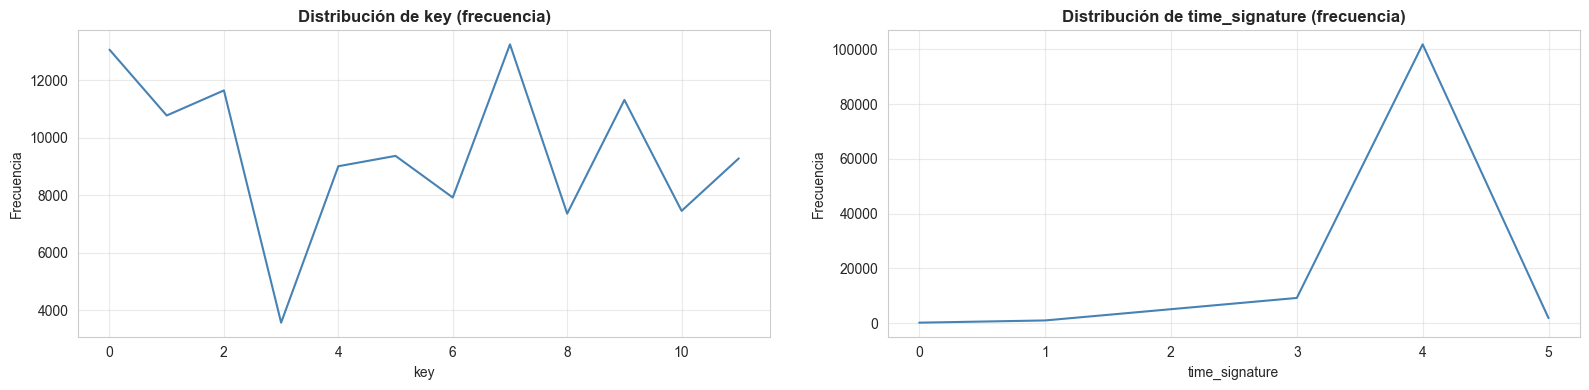

In [19]:
visualize_discrete_features(num_df, ['key', 'time_signature'])

#### Variables key y time_signature

En el caso de las variables key y time_signature, se observa que ambas presentan una naturaleza discreta y ordinal. Es por este motivo por el cual se decide representar mediante gráficos de líneas ya que permiten visualizar la frecuencia de aparición de cada categoría.

En la variable key, los valores se distribuyen de forma irregular entre las doce tonalidades posibles. Este comportamiento sugiere que las canciones del conjunto de datos abarcan una amplia variedad tonal, sin predominio evidente de una tonalidad específica.

Por otro lado, la variable time_signature (compás musical) muestra una concentración muy marcada en el valor 4. En el conjunto de datos Spotify Tracks Dataset se considera que el valor 4 refiere al compás 4/4, el más habitual en la mayoría de los géneros musicales populares. En contraste, los compases alternativos, como 3/4 (valor 3) o 5/4 (valor 5), aparecen con una frecuencia mucho menor, lo que evidencia que la gran mayoría de las canciones siguen estructuras rítmicas basadas en compases de 4 tiempos por 4 negras.


### 1.2.5 Valores atípicos

Antes de decidir cómo se tratarán los valores atípicos en la fase de preparación de los datos, resulta conveniente analizar los outliers de cada variable para determinar si realmente podrían afectar al desarrollo y posterior implementación del modelo. Para ello, se han empleado representaciones tipo boxplot, que permiten visualizar la presencia y magnitud de los valores extremos.

Por un lado, las variables energy, acousticness, valence y popularity no presentan valores atípicos significativos que puedan interferir en las siguientes fases del proyecto. Si bien popularity muestra un outlier aislado, este se considera inofensivo de cara al entrenamiento del modelo, dado que no altera de forma sustancial la distribución general de la variable.

Por otro lado, las variables continuas duration_ms, danceability, loudness, speechiness, instrumentalness, liveness y tempo presentan una cantidad considerable de valores atípicos. Sin embargo, cada una de ellas abarca un rango de valores muy amplio que refleja la diversidad de características de la música. Por este motivo, no resulta apropiado eliminar ni modificar estos outliers, ya que representan comportamientos totalmente válidos dentro del dominio de estudio. Al fin y al cabo, la música puede adoptar formas y matices muy distintos, y esta variabilidad constituye una parte fundamental para el desarrollo del proyecto.

### 1.2.6 Resumen estadístico para memoria del TFG

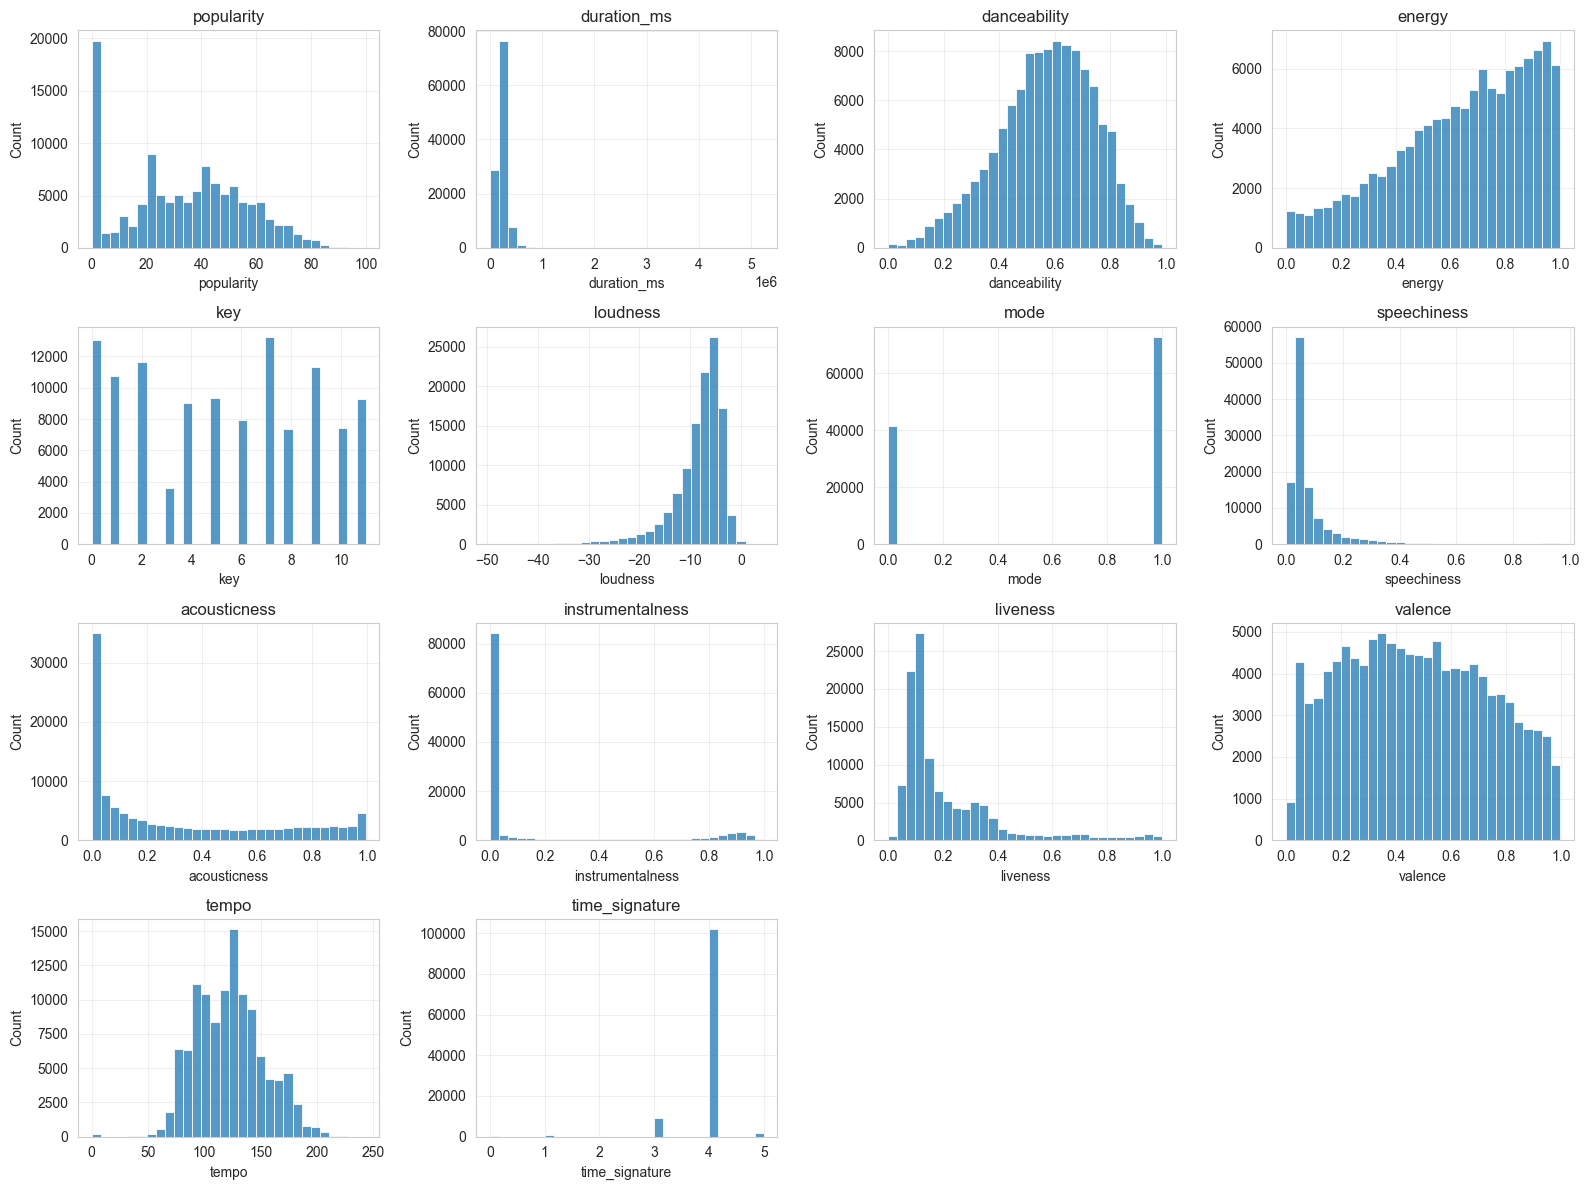

In [20]:
plot_numeric_hist_grid(df)

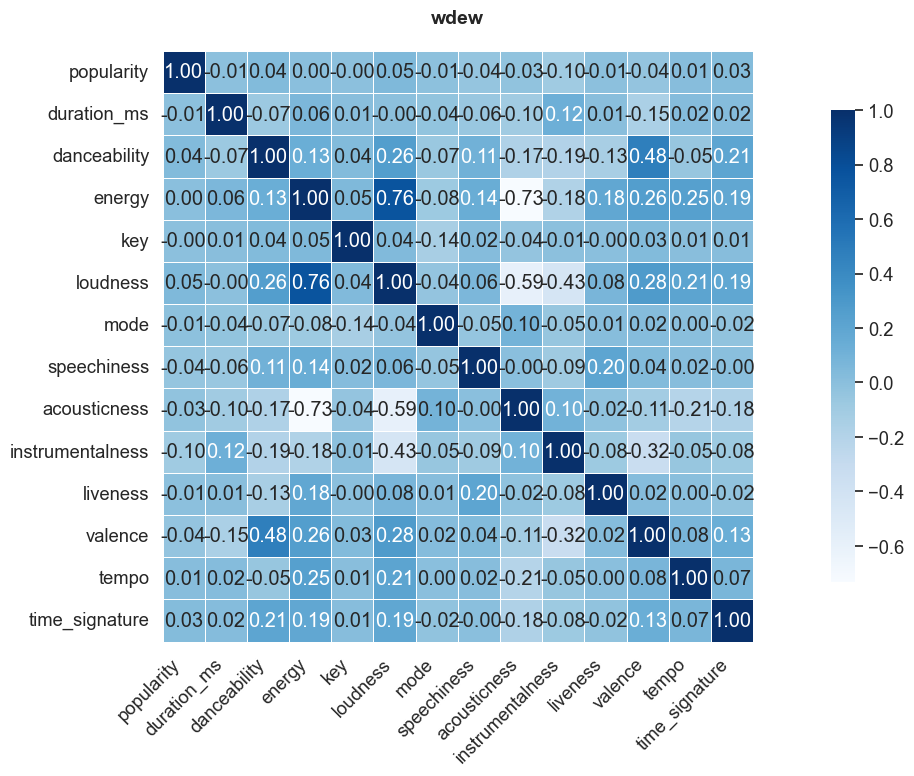

In [21]:
num_df = df.select_dtypes(include='number')
if num_df.shape[1] == 0:
    raise ValueError("El DataFrame no contiene columnas numéricas para calcular correlación.")

# Calcular matriz de correlación
corr_matrix = num_df.corr(numeric_only=True).round(3)

# Configuración del gráfico
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid", font_scale=1.2)

# Crear heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f", square=True,
                cbar_kws={"shrink": 0.8})
ax.set_title('wdew', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Mostrar algún gráfico donde se refleje las frecuencias entre variable - variable booleana.
Mostrar el top 10 de artistas
Mostrar el top 10 de canciones
MOstrar el top 10 de albums
Mostrar el top 10 de géneros

Mostrar el top 10 de artistas menos esucchados
Mostrar el top 10 de canciones menos esucchadas
Mostrar el top 10 de álbums menos escuchados
Mostrar el top 10 de géneros menos escuchados


Recortatorio: 
En Fase 2 (ahora):

- Discretizar popularity para análisis exploratorio.
- Generar visualizaciones: top 10 artistas/canciones/álbumes/géneros.
- Analizar distribuciones de características musicales por nivel de popularidad.
- Incluir una justificación: "La discretización permite identificar patrones que informarán las decisiones de preparación de datos".

En Fase 3:
- Decidir si popularity se usa en el clustering (según objetivos) o se excluye.
- Si se usa, aplicar la misma discretización al dataset de modelado.
- Documentar la decisión.
